In [2]:
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

## 한글 폰트 설정
# 윈도우인 경우 아래 두줄
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)
# macOs인 경우 아래 한줄
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
path = r'/Users/gamgoon/Development/ML/realty/★(월간)KB주택가격동향_시계열(2019.05)21667280850300244.xls'

In [4]:
# raw_data = pd.read_excel(path, sheet_name='매매종합') # encrypt error 발생
# 대신 xlwings 사용
wb = xw.Book(path)
sheet = wb.sheets['매매종합']
# raw_data = sheet['A2:GE405'].options(pd.DataFrame, index=False, header=True).value # 범위를 명시적으로 지정해줄 수 있다.
# 하지만 매달 새로운 row가 추가되기 때문에 동저긍로 행의 개수를 읽어온다.
# 여기서 end('down')의 뜻이 뭐지? 아래 링크 참조. CTR+DOWN 과 같은 의미. 해보니까 3번을 해야 전체행이 선택된다. 자세한건 나중에.
# https://docs.xlwings.org/en/stable/api.html#xlwings.Range.end
row_num = sheet.range('A1','A1').end('down').end('down').end('down').row
data_range = 'A2:GE' + str(row_num)
# 여기서 index 옵션 의미가? True 하니까 결과값에 index 열이 빠진다.
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0]) # iloc[] 이 뭐지? integer position으로 값을 찾는 거라고... 

In [5]:
print(type(raw_data))
print(type(big_col))
print(type(small_col))

<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


In [6]:
print(big_col)

['구분', '전국', '서울', '강북', None, None, None, None, None, None, None, None, None, None, None, None, None, None, '강남', None, None, None, None, None, None, None, None, None, None, None, '6개광역시', '부산', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '대구', None, None, None, None, None, None, None, None, '인천', None, None, None, None, None, None, None, None, '광주', None, None, None, None, None, '대전', None, None, None, None, None, '울산', None, None, None, None, None, '5개광역시\n(인천外)', '수도권', '세종', '경기', '수원', None, None, None, None, '성남', None, None, None, '고양', None, None, None, '안양', None, None, '부천', '의정부', '광명', '평택', '안산', None, None, '과천', '구리', '남양주', '용인', None, None, None, '시흥', '군포', '의왕', '하남', '오산', '파주', '이천', '안성', '김포', '양주', '동두천', '광주', '화성', '강원', '춘천', None, '원주', '충북', '청주', None, None, None, None, '충주', '제천', '충남', '천안', None, None, '공주', '아산', '논산', '계룡', '당진', '서산', '전북', '전주', None, None, '익산', '군산', '전남', '목포', '순천', '광양', '여수'

In [7]:
print(small_col)

[None, None, None, None, '강북구', '광진구', '노원구', '도봉구', '동대문구', '마포구', '서대문구', '성동구', '성북구', '용산구', '은평구', '종로구', '중구', '중랑구', None, '강남구', '강동구', '강서구', '관악구', '구로구', '금천구', '동작구', '서초구', '송파구', '양천구', '영등포구', None, None, '중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '강서구', None, '중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군', None, '중구', '동구', '미추홀구', '연수구', '남동구', '부평구', '계양구', '서구', None, '동구', '서구', '남구', '북구', '광산구', None, '동구', '중구', '서구', '유성구', '대덕구', None, '중구', '남구', '동구', '북구', '울주군', None, None, None, None, None, '장안구', '권선구', '팔달구', '영통구', None, '수정구', '중원구', '분당구', None, '덕양구', '일산동구', '일산서구', None, '만안구', '동안구', None, None, None, None, None, '단원구', '상록구', None, None, None, None, '처인구', '기흥구', '수지구', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '강릉', None, None, None, '상당구', '서원구', '청원구', '흥덕구', None, None, None, None, '동남구', '서북구', None, None, None, None, None, None, Non

In [8]:
for index, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[index] = big_col[index]
    check = index
    while True:
        if big_col[check] in bigname_list:
            big_col[index] = big_col[check]
            break
        else:
            check = check - 1

In [9]:
print(big_col)

['구분', '전국', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '6개광역시', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '광주', '광주', '광주', '광주', '광주', '광주', '대전', '대전', '대전', '대전', '대전', '대전', '울산', '울산', '울산', '울산', '울산', '울산', '울산', '수도권', '세종', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '광주', '광주', '강원', '강원', '강원', '강원', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '전북', '전북', '전북', '전북', '전북', '전북', '전남', '전남', '전남', '전남', '전남', '경북', '경북',

In [10]:
print(small_col)

['구분', '전국', '서울', '강북', '강북구', '광진구', '노원구', '도봉구', '동대문구', '마포구', '서대문구', '성동구', '성북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남', '강남구', '강동구', '강서구', '관악구', '구로구', '금천구', '동작구', '서초구', '송파구', '양천구', '영등포구', '6개광역시', '부산', '중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '강서구', '대구', '중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군', '인천', '중구', '동구', '미추홀구', '연수구', '남동구', '부평구', '계양구', '서구', '광주', '동구', '서구', '남구', '북구', '광산구', '대전', '동구', '중구', '서구', '유성구', '대덕구', '울산', '중구', '남구', '동구', '북구', '울주군', '5개광역시\n(인천外)', '수도권', '세종', '경기', '수원', '장안구', '권선구', '팔달구', '영통구', '성남', '수정구', '중원구', '분당구', '고양', '덕양구', '일산동구', '일산서구', '안양', '만안구', '동안구', '부천', '의정부', '광명', '평택', '안산', '단원구', '상록구', '과천', '구리', '남양주', '용인', '처인구', '기흥구', '수지구', '시흥', '군포', '의왕', '하남', '오산', '파주', '이천', '안성', '김포', '양주', '동두천', '광주', '화성', '강원', '춘천', '강릉', '원주', '충북', '청주', '상당구', '서원구', '청원구', '흥덕구', '충주', '제천', '충남', '천안', '동남구', '서북구', '공주', '아산', '논산', '계룡'

In [11]:
print(big_col[129])
print(big_col[130])
big_col[129] = '경기'
big_col[130] = '경기'
small_col[185] = '서귀포'

광주
광주


In [12]:
raw_data.columns = [big_col, small_col]

In [13]:
new_col_data = raw_data.drop([0,1])

In [14]:
new_col_data

구분       전국       서울                                               \
         구분       전국       서울       강북      강북구      광진구      노원구      도봉구   
2      86.1  34.6561  30.0438    41.94     None     None     None     None   
3         2  34.6561  30.0438  41.8891     None     None     None     None   
4         3   34.708  30.0024  41.8891     None     None     None     None   
5         4  34.4486  29.8366  41.7366     None     None     None     None   
6         5  34.2929   29.588  41.2791     None     None     None     None   
7         6  34.1373  29.3808  41.2791     None     None     None     None   
8         7  34.0335  29.2979  41.2283     None     None     None     None   
9         8  34.0335  29.2979  41.2283     None     None     None     None   
10        9  34.0335  29.2979  41.2283     None     None     None     None   
11       10  34.0335  29.1736  41.0758     None     None     None     None   
12       11   33.826  28.9249  41.0249     None     None     None     None   
13       12  33.7222  28.7177  40.7708     None     None     None     None   
14     87.1  33.6704  28.7177  40.8724     None     None     None     None   
15        2  33.6185  28.6349  40.8216     None     None     None     None   
16        3  33.5666  28.4691  40.5166     None     None     None     None   
17        4  33.6185  28.3862  40.4657     None     None     None     None   
18        5  33.6185  28.3448  40.4657     None     None     None     None   
19        6  33.6185   28.179  40.0082     None     None     None     None   
20        7  33.6704  28.1376  40.0082     None     None     None     None   
21        8   33.826   28.179  40.0082     None     None     None     None   
22        9   35.123  28.8835  40.8216     None     None     None     None   
23       10  35.6418  29.1321  41.2283     None     None     None     None   
24       11  36.0569  29.2565  41.2283     None     None     None     None   
25       12  36.1087  29.2979    41.33     None     None     None     None   
26     88.1  36.5757  29.5051  41.3808     None     None     None     None   
27        2  37.4576  30.2925  42.0417     None     None     None     None   
28        3  38.3915  30.9141  42.9567     None     None     None     None   
29        4  39.1697  31.4942  43.4651     None     None     None     None   
30        5  39.5328  31.5356  43.4142     None     None     None     None   
31        6  39.8441  31.5356  43.4142     None     None     None     None   
..      ...      ...      ...      ...      ...      ...      ...      ...   
373      12  95.7265   87.291  88.3621  94.7381  90.3174   86.196  87.5124   
374  2017.1  95.7484  87.3137  88.4163  94.7839  90.3299  86.3516  87.5651   
375       2  95.7586  87.3431  88.4552  94.8054   90.312  86.4637  87.6027   
376       3   95.784   87.414  88.5145  94.8165  90.3186  86.5916  87.6486   
377       4  95.8204  87.5048  88.5949  94.8873  90.3388  86.7127  87.7324   
378       5  95.8698  87.6448  88.6925  94.9142  90.4258  86.8324  87.8078   
379       6  96.0372  88.1252  89.1074  95.0678   91.112  87.6501   88.241   
380       7  96.2617  88.6796   89.642  95.1623  91.4884  88.7935  88.9395   
381       8   96.491   89.296  90.2172  95.4357  91.9929  89.7442  89.8887   
382       9  96.5725  89.4259  90.3587  95.5184  92.2425  89.6877  89.9414   
383      10  96.6813  89.7056  90.5847  95.8087  92.5673  89.8381  90.1313   
384      11  96.8141  90.1014  90.9064   95.944  93.1737  90.0221  90.3756   
385      12  96.9132  90.5076  91.2057  96.1317  93.5745  90.2274   90.623   
386  2018.1  97.0944  91.1494   91.608  96.1806   94.371  90.3453  90.9477   
387       2  97.3038  91.7823  92.0378  96.2969  94.9933   90.699  91.1811   
388       3  97.5466  92.6254  92.8785  96.4963  96.1579  91.3077  91.5234   
389       4  97.7113    93.27  93.5745  96.6295  96.5825  91.7005   92.053   
390       5  97.8098  93.6225  93.9109  96.7089  96.7818  91.8602  92.8976   
391       6  97.9042  93.9812  

In [15]:
index_list = list(new_col_data['구분']['구분'])
# print(index_list)
new_index = []
for index, raw_index in enumerate(index_list):
    print(raw_index)
    temp = str(raw_index).split('.')
    print(temp)
    last = ''
    if int(temp[0]) > 12:
        if len(temp[0]) == 2:
            last = '19' + temp[0] + '.' + temp[1]
            new_index.append(last)
        else:
            last = temp[0] + '.' + temp[1]
            new_index.append(last)
    else:
        last = new_index[index - 1].split('.')[0] + '.' + temp[0]
        new_index.append(last)
    print(last)
# print(new_index)

86.1
['86', '1']
1986.1
2.0
['2', '0']
1986.2
3.0
['3', '0']
1986.3
4.0
['4', '0']
1986.4
5.0
['5', '0']
1986.5
6.0
['6', '0']
1986.6
7.0
['7', '0']
1986.7
8.0
['8', '0']
1986.8
9.0
['9', '0']
1986.9
10.0
['10', '0']
1986.10
11.0
['11', '0']
1986.11
12.0
['12', '0']
1986.12
87.1
['87', '1']
1987.1
2.0
['2', '0']
1987.2
3.0
['3', '0']
1987.3
4.0
['4', '0']
1987.4
5.0
['5', '0']
1987.5
6.0
['6', '0']
1987.6
7.0
['7', '0']
1987.7
8.0
['8', '0']
1987.8
9.0
['9', '0']
1987.9
10.0
['10', '0']
1987.10
11.0
['11', '0']
1987.11
12.0
['12', '0']
1987.12
88.1
['88', '1']
1988.1
2.0
['2', '0']
1988.2
3.0
['3', '0']
1988.3
4.0
['4', '0']
1988.4
5.0
['5', '0']
1988.5
6.0
['6', '0']
1988.6
7.0
['7', '0']
1988.7
8.0
['8', '0']
1988.8
9.0
['9', '0']
1988.9
10.0
['10', '0']
1988.10
11.0
['11', '0']
1988.11
12.0
['12', '0']
1988.12
89.1
['89', '1']
1989.1
2.0
['2', '0']
1989.2
3.0
['3', '0']
1989.3
4.0
['4', '0']
1989.4
5.0
['5', '0']
1989.5
6.0
['6', '0']
1989.6
7.0
['7', '0']
1989.7
8.0
['8', '0']
1989

In [16]:
new_col_data.set_index(pd.to_datetime(new_index), inplace=True) # inplace : Modify the DataFrame in place (do not create a new object).
cleaned_data = new_col_data.drop(('구분', '구분'), axis=1) # drop axis의 경우 column이면 1, row이면 0이다.

In [17]:
new_col_data

구분       전국       서울                                      \
                구분       전국       서울       강북      강북구      광진구      노원구   
1986-01-01    86.1  34.6561  30.0438    41.94     None     None     None   
1986-02-01       2  34.6561  30.0438  41.8891     None     None     None   
1986-03-01       3   34.708  30.0024  41.8891     None     None     None   
1986-04-01       4  34.4486  29.8366  41.7366     None     None     None   
1986-05-01       5  34.2929   29.588  41.2791     None     None     None   
1986-06-01       6  34.1373  29.3808  41.2791     None     None     None   
1986-07-01       7  34.0335  29.2979  41.2283     None     None     None   
1986-08-01       8  34.0335  29.2979  41.2283     None     None     None   
1986-09-01       9  34.0335  29.2979  41.2283     None     None     None   
1986-10-01      10  34.0335  29.1736  41.0758     None     None     None   
1986-11-01      11   33.826  28.9249  41.0249     None     None     None   
1986-12-01      12  33.7222  28.7177  40.7708     None     None     None   
1987-01-01    87.1  33.6704  28.7177  40.8724     None     None     None   
1987-02-01       2  33.6185  28.6349  40.8216     None     None     None   
1987-03-01       3  33.5666  28.4691  40.5166     None     None     None   
1987-04-01       4  33.6185  28.3862  40.4657     None     None     None   
1987-05-01       5  33.6185  28.3448  40.4657     None     None     None   
1987-06-01       6  33.6185   28.179  40.0082     None     None     None   
1987-07-01       7  33.6704  28.1376  40.0082     None     None     None   
1987-08-01       8   33.826   28.179  40.0082     None     None     None   
1987-09-01       9   35.123  28.8835  40.8216     None     None     None   
1987-10-01      10  35.6418  29.1321  41.2283     None     None     None   
1987-11-01      11  36.0569  29.2565  41.2283     None     None     None   
1987-12-01      12  36.1087  29.2979    41.33     None     None     None   
1988-01-01    88.1  36.5757  29.5051  41.3808     None     None     None   
1988-02-01       2  37.4576  30.2925  42.0417     None     None     None   
1988-03-01       3  38.3915  30.9141  42.9567     None     None     None   
1988-04-01       4  39.1697  31.4942  43.4651     None     None     None   
1988-05-01       5  39.5328  31.5356  43.4142     None     None     None   
1988-06-01       6  39.8441  31.5356  43.4142     None     None     None   
...            ...      ...      ...      ...      ...      ...      ...   
2016-12-01      12  95.7265   87.291  88.3621  94.7381  90.3174   86.196   
2017-01-01  2017.1  95.7484  87.3137  88.4163  94.7839  90.3299  86.3516   
2017-02-01       2  95.7586  87.3431  88.4552  94.8054   90.312  86.4637   
2017-03-01       3   95.784   87.414  88.5145  94.8165  90.3186  86.5916   
2017-04-01       4  95.8204  87.5048  88.5949  94.8873  90.3388  86.7127   
2017-05-01       5  95.8698  87.6448  88.6925  94.9142  90.4258  86.8324   
2017-06-01       6  96.0372  88.1252  89.1074  95.0678   91.112  87.6501   
2017-07-01       7  96.2617  88.6796   89.642  95.1623  91.4884  88.7935   
2017-08-01       8   96.491   89.296  90.2172  95.4357  91.9929  89.7442   
2017-09-01       9  96.5725  89.4259  90.3587  95.5184  92.2425  89.6877   
2017-10-01      10  96.6813  89.7056  90.5847  95.8087  92.5673  89.8381   
2017-11-01      11  96.8141  90.1014  90.9064   95.944  93.1737  90.0221   
2017-12-01      12  96.9132  90.5076  91.2057  96.1317  93.5745  90.2274   
2018-01-01  2018.1  97.0944  91.1494   91.608  96.1806   94.371  90.3453   
2018-02-01       2  97.3038  91.7823  92.0378  96.2969  94.9933   90.699   
2018-03-01       3  97.5466  92.6254  92.8785  96.4963  96.1579  91.3077   
2018-04-01       4  97.7113    93.27  93.5745  96.6295  96.5825  91.7005   
2018-05-01       5  97.8098  93.6225  93.9109  96.7089  96.7818  91.8602   
2018-06-01       6  97.9042  93.9812  94.1928  96.8714  96.9526  91.9407   
2018-07-01       7  98.0176  94.5351   94.832    96.93  97.1999 

In [18]:
def KBpriceindex_preprocessing(path, data_type):
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range('A1','A1').end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])
    for index, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[index] = big_col[index]
        check = index
        while True:
            if big_col[check] in bigname_list:
                big_col[index] = big_col[check]
                break
            else:
                check = check - 1
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    new_col_data
    index_list = list(new_col_data['구분']['구분'])
    new_index = []
    for index, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        last = ''
        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                last = '19' + temp[0] + '.' + temp[1]
                new_index.append(last)
            else:
                last = temp[0] + '.' + temp[1]
                new_index.append(last)
        else:
            last = new_index[index - 1].split('.')[0] + '.' + temp[0]
            new_index.append(last)
    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data
                

In [19]:
new_data = KBpriceindex_preprocessing(path, '매매종합')

In [20]:
new_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
1986-06-01  34.1373  29.3808  41.2791     None     None     None     None   
1986-07-01  34.0335  29.2979  41.2283     None     None     None     None   
1986-08-01  34.0335  29.2979  41.2283     None     None     None     None   
1986-09-01  34.0335  29.2979  41.2283     None     None     None     None   
1986-10-01  34.0335  29.1736  41.0758     None     None     None     None   
1986-11-01   33.826  28.9249  41.0249     None     None     None     None   
1986-12-01  33.7222  28.7177  40.7708     None     None     None     None   
1987-01-01  33.6704  28.7177  40.8724     None     None     None     None   
1987-02-01  33.6185  28.6349  40.8216     None     None     None     None   
1987-03-01  33.5666  28.4691  40.5166     None     None     None     None   
1987-04-01  33.6185  28.3862  40.4657     None     None     None     None   
1987-05-01  33.6185  28.3448  40.4657     None     None     None     None   
1987-06-01  33.6185   28.179  40.0082     None     None     None     None   
1987-07-01  33.6704  28.1376  40.0082     None     None     None     None   
1987-08-01   33.826   28.179  40.0082     None     None     None     None   
1987-09-01   35.123  28.8835  40.8216     None     None     None     None   
1987-10-01  35.6418  29.1321  41.2283     None     None     None     None   
1987-11-01  36.0569  29.2565  41.2283     None     None     None     None   
1987-12-01  36.1087  29.2979    41.33     None     None     None     None   
1988-01-01  36.5757  29.5051  41.3808     None     None     None     None   
1988-02-01  37.4576  30.2925  42.0417     None     None     None     None   
1988-03-01  38.3915  30.9141  42.9567     None     None     None     None   
1988-04-01  39.1697  31.4942  43.4651     None     None     None     None   
1988-05-01  39.5328  31.5356  43.4142     None     None     None     None   
1988-06-01  39.8441  31.5356  43.4142     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2016-12-01  95.7265   87.291  88.3621  94.7381  90.3174   86.196  87.5124   
2017-01-01  95.7484  87.3137  88.4163  94.7839  90.3299  86.3516  87.5651   
2017-02-01  95.7586  87.3431  88.4552  94.8054   90.312  86.4637  87.6027   
2017-03-01   95.784   87.414  88.5145  94.8165  90.3186  86.5916  87.6486   
2017-04-01  95.8204  87.5048  88.5949  94.8873  90.3388  86.7127  87.7324   
2017-05-01  95.8698  87.6448  88.6925  94.9142  90.4258  86.8324  87.8078   
2017-06-01  96.0372  88.1252  89.1074  95.0678   91.112  87.6501   88.241   
2017-07-01  96.2617  88.6796   89.642  95.1623  91.4884  88.7935  88.9395   
2017-08-01   96.491   89.296  90.2172  95.4357  91.9929  89.7442  89.8887   
2017-09-01  96.5725  89.4259  90.3587  95.5184  92.2425  89.6877  89.9414   
2017-10-01  96.6813  89.7056  90.5847  95.8087  92.5673  89.8381  90.1313   
2017-11-01  96.8141  90.1014  90.9064   95.944  93.1737  90.0221  90.3756   
2017-12-01  96.9132  90.5076  91.2057  96.1317  93.5745  90.2274   90.623   
2018-01-01  97.0944  91.1494   91.608  96.1806   94.371  90.3453  90.9477   
2018-02-01  97.3038  91.7823  92.0378  96.2969  94.9933   90.699  91.1811   
2018-03-01  97.5466  92.6254  92.8785  96.4963  96.1579  91.3077  91.5234   
2018-04-01  97.7113    93.27  93.5745  96.6295  96.5825  91.7005   92.053   
2018-05-01  97.8098  93.6225  93.9109  96.7089  96.7818  91.8602  92.8976   
2018-06-01  97.9042  93.9812  94.1928  96.8714  96.9526  91.9407  93.0628   
2018-07-01  9

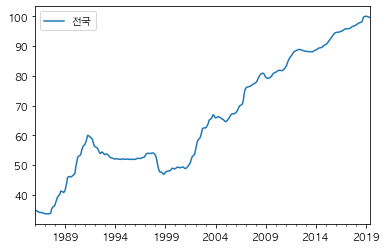

In [21]:
new_data['전국']['전국'].plot(legend='전국')
plt.show()

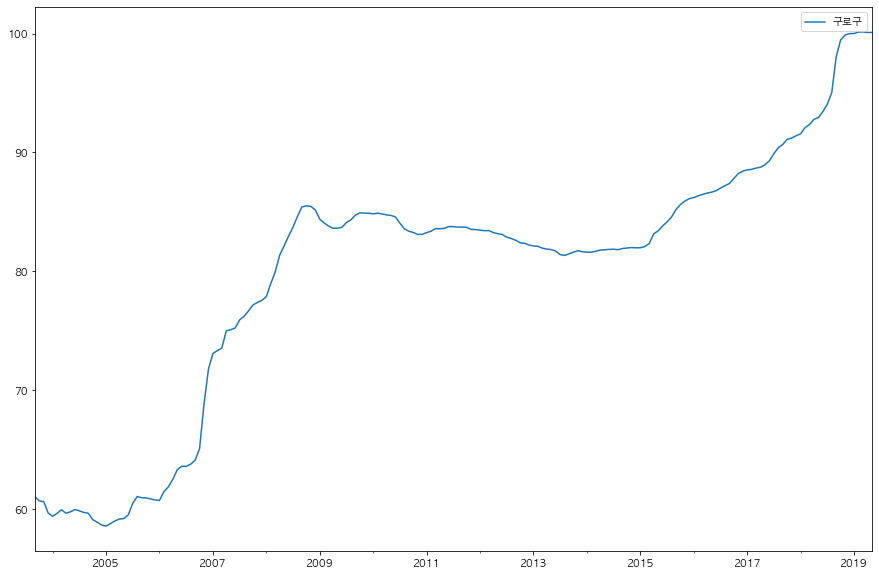

In [22]:
# new_data['서울']['구로구']
plt.figure(figsize=(15, 10)) # 그림(그래프)의 크기를 지정 (너비, 높이)
new_data['서울']['구로구']['2003-09':].plot(legend='구로구')
plt.show()

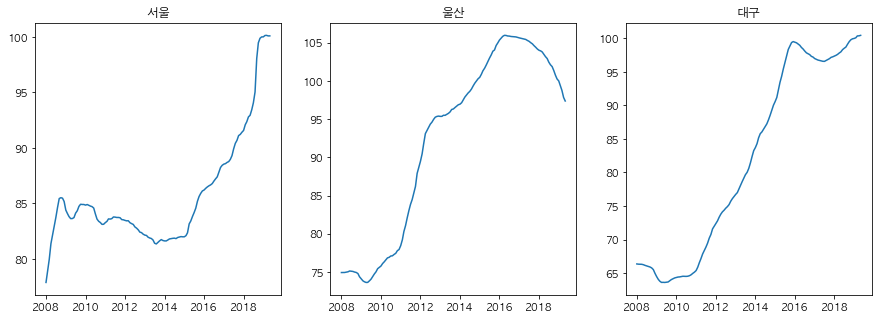

In [23]:
plt.figure(figsize=(15, 5)) # 그림(그래프)의 크기를 지정 (너비, 높이)

plt.subplot(1, 3, 1) # (전체행, 전체열, 현재열)
plt.title('서울')
plt.plot(new_data['서울']['구로구']['2008-01':])

plt.subplot(1, 3, 2)
plt.title('울산')
plt.plot(new_data['울산']['울산']['2008-01':])

plt.subplot(1, 3, 3)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()

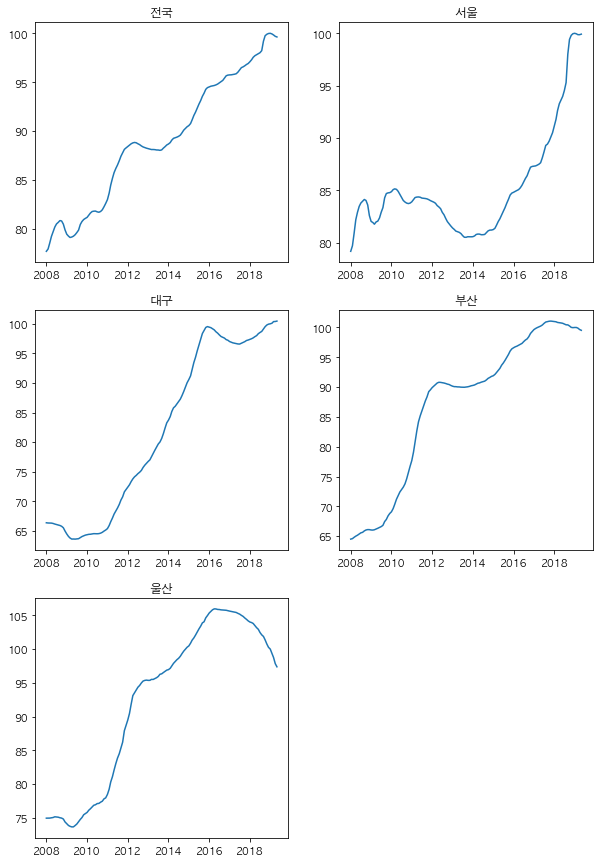

In [24]:
spots = '전국 서울 대구 부산 울산'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list) - 1 ) / 2 ) + 1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i + 1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])
    
plt.show()

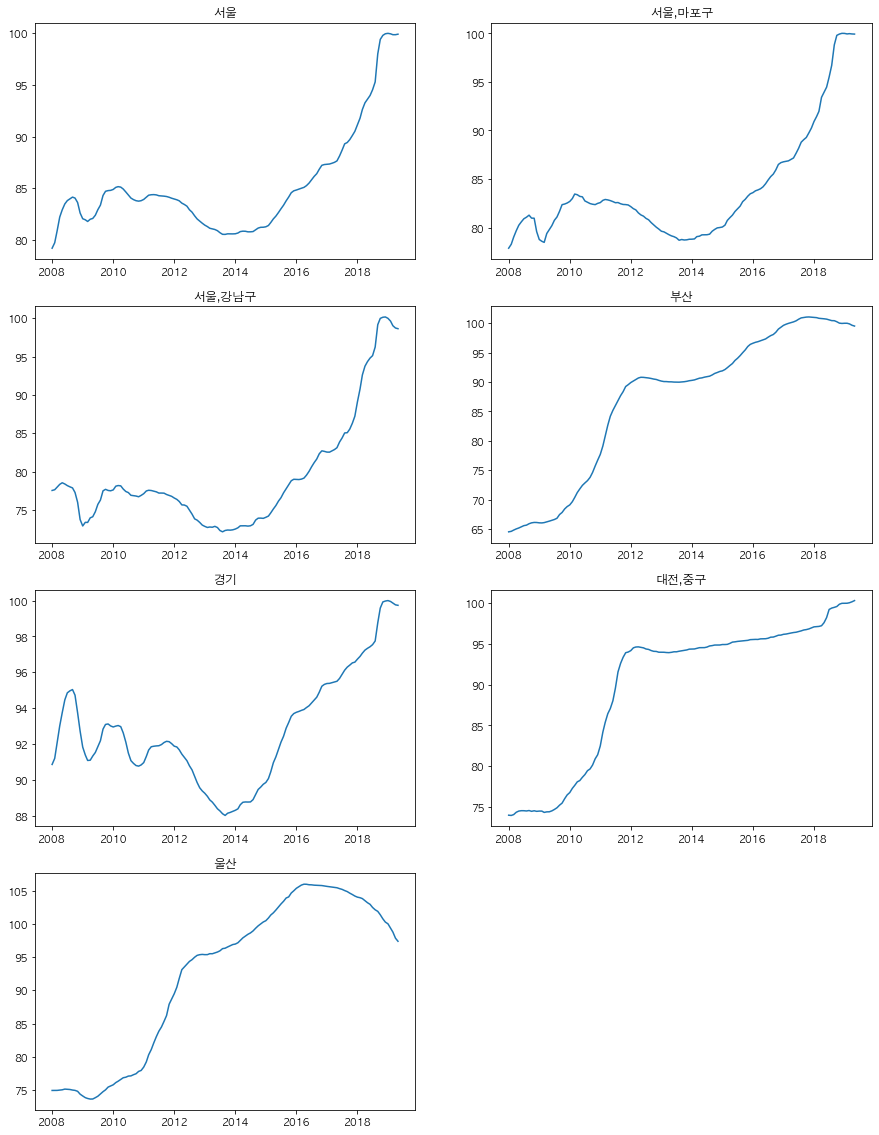

In [26]:
spots = '서울 서울,마포구 서울,강남구 부산 경기 대전,중구 울산'
spot_list = spots.split(' ')
num_row = int((len(spot_list) -1 ) / 2) + 1

plt.figure(figsize=(15, num_row * 5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])
    
plt.show()

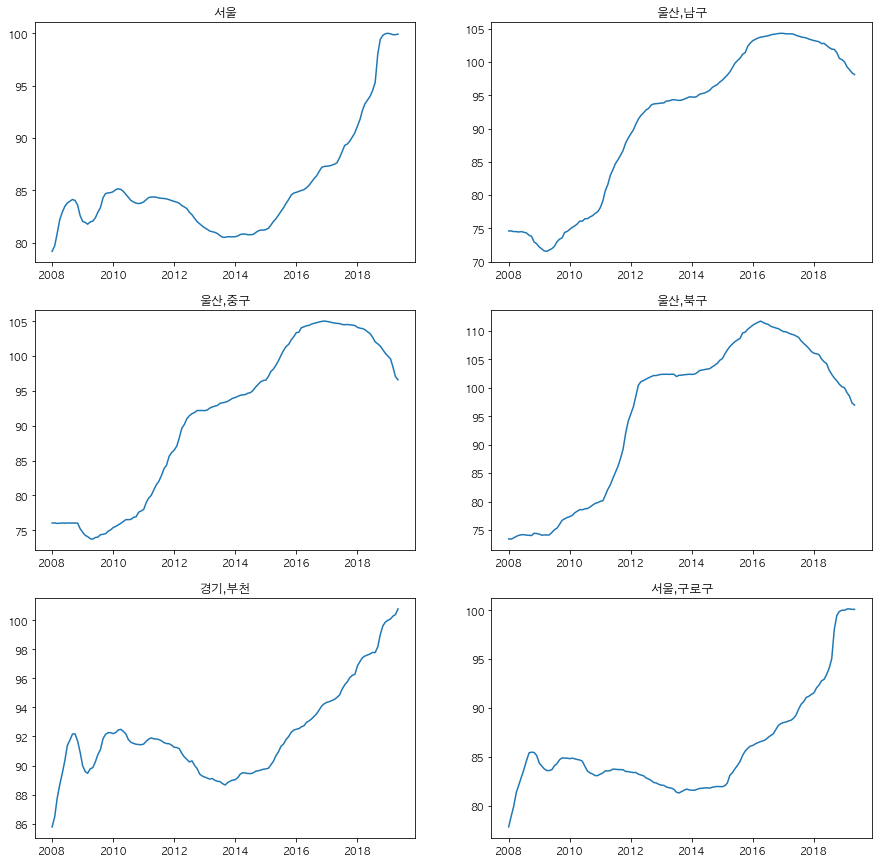

In [143]:
spots = '서울 울산,남구 울산,중구 울산,북구 경기,부천 서울,구로구'
spot_list = spots.split(' ')
num_row = int((len(spot_list) -1 ) / 2) + 1

plt.figure(figsize=(15, num_row * 5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])
    
plt.show()

In [168]:
# 특정 날짜의 전 지역 가격지수 데이터 가져오기
diff = ((new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2018-1-1'] * 100).dropna()
print("하위 10개")
print(diff.sort_values(ascending=True)[:10])
print(' ')
print("상위 10개")
print(diff.sort_values(ascending=False)[:40])

하위 10개
경남  성산구   -11.8424
경북  구미    -7.87245
경남  의창구   -6.83157
    창원    -5.63951
경북  북구    -5.35519
경남  진해구   -5.23594
경북  경북    -5.21622
울산  동구    -4.81585
충북  상당구   -4.68649
울산  북구    -4.66617
dtype: object
 
상위 10개
서울   강남구      11.372
경기   분당구     9.96378
서울   서초구     9.38292
     송파구     9.28011
     영등포구    9.23217
     성동구      8.7384
     강동구     8.32162
     마포구     8.05794
     강남      7.93349
     양천구      7.6487
     노원구     7.45951
     서울      6.94139
경기   성남      6.82628
서울   동작구     6.81093
     동대문구    6.76726
경기   과천      6.75365
     동안구     6.54579
부산   동래구     6.27627
서울   용산구     6.19633
부산   해운대구    6.02587
서울   성북구     5.99371
     강북      5.91658
     구로구     5.86355
     광진구     5.81896
     강서구     5.80471
경기   광명      5.64677
서울   도봉구     5.62579
경기   안양      5.55867
부산   남구      5.53204
서울   서대문구    5.51857
     금천구     5.38866
     중구      5.29729
경기   구리      4.95855
서울   관악구     4.86537
부산   북구      4.80898
전남   순천      4.77332
수도권  수도권     4.66831
서울 

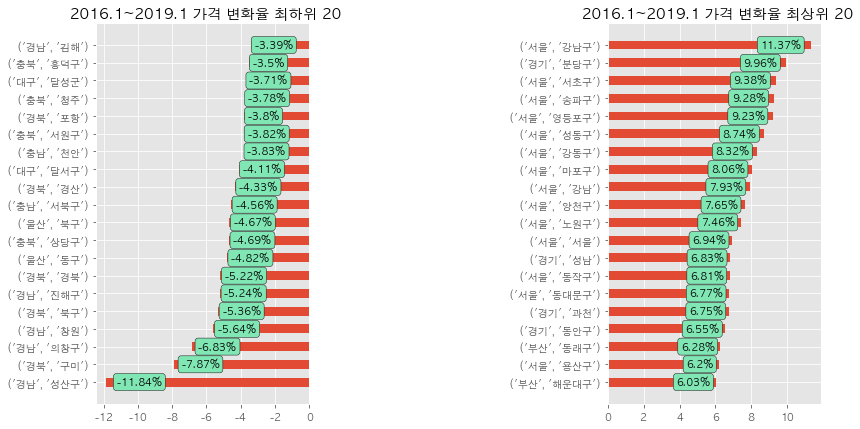

In [183]:
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(13, 7))
ind = np.arange(20)

ax = fig.add_subplot(1, 3, 1)
plt.title(' 2016.1~2018.1 가격 변화율 최하위 20')
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
           rect.get_y() + rect.get_height() / 2.0,
           str(round(diff.sort_values()[:20].values[i], 2)) + '%',
           ha='left', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec="0.1"))
    
ax2 = fig.add_subplot(1, 3, 3)
plt.title(' 2016.1~2018.1 가격 변화율 최상위 20')
rects2 = plt.barh(ind, diff.sort_values()[-20:].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[-20:].index)
for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
           rect.get_y() + rect.get_height() / 2.0,
           str(round(diff.sort_values()[-20:].values[i], 2)) + '%',
           ha='right', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec="0.1"))
    
plt.show()

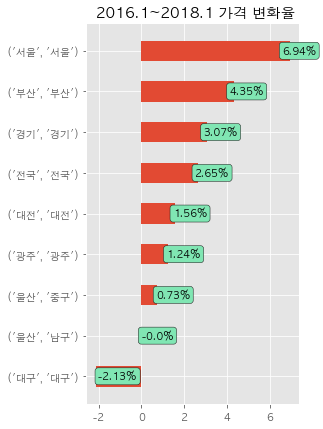

In [186]:
# 특정 지역만 선택해서 가격지수 증감률을 시각화
loca = '전국 서울 부산 경기 대구 광주 울산,남구 울산,중구 대전'

temp_list = loca.split(' ')
loca_list = []
for temp in temp_list:
    if ',' in temp:
        temp_split = temp.split(',')
        loca_list.append((temp_split[0], temp_split[1]))
    else:
        loca_list.append((temp, temp))
        
diff = ((new_data.loc['2018-1-1', loca_list] - new_data.loc['2016-1-1', loca_list]) / new_data.loc['2018-1-1', loca_list] * 100).sort_values()
num = len(loca_list)
fig = plt.figure(figsize=(13, 7))
ind = np.arange(num)

ax = fig.add_subplot(1, 3, 1)
plt.title(' 2016.1~2018.1 가격 변화율')
rects = plt.barh(ind, diff.head(num).values, align='center', height=0.5)
plt.yticks(ind, diff.head(num).index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
           rect.get_y() + rect.get_height() / 2.0,
           str(round(diff.head(20).values[i], 2)) + '%',
           ha='left', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec="0.1"))
plt.show()

In [188]:
price_data = KBpriceindex_preprocessing(path, '매매종합')
price_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
1986-06-01  34.1373  29.3808  41.2791     None     None     None     None   
1986-07-01  34.0335  29.2979  41.2283     None     None     None     None   
1986-08-01  34.0335  29.2979  41.2283     None     None     None     None   
1986-09-01  34.0335  29.2979  41.2283     None     None     None     None   
1986-10-01  34.0335  29.1736  41.0758     None     None     None     None   
1986-11-01   33.826  28.9249  41.0249     None     None     None     None   
1986-12-01  33.7222  28.7177  40.7708     None     None     None     None   
1987-01-01  33.6704  28.7177  40.8724     None     None     None     None   
1987-02-01  33.6185  28.6349  40.8216     None     None     None     None   
1987-03-01  33.5666  28.4691  40.5166     None     None     None     None   
1987-04-01  33.6185  28.3862  40.4657     None     None     None     None   
1987-05-01  33.6185  28.3448  40.4657     None     None     None     None   
1987-06-01  33.6185   28.179  40.0082     None     None     None     None   
1987-07-01  33.6704  28.1376  40.0082     None     None     None     None   
1987-08-01   33.826   28.179  40.0082     None     None     None     None   
1987-09-01   35.123  28.8835  40.8216     None     None     None     None   
1987-10-01  35.6418  29.1321  41.2283     None     None     None     None   
1987-11-01  36.0569  29.2565  41.2283     None     None     None     None   
1987-12-01  36.1087  29.2979    41.33     None     None     None     None   
1988-01-01  36.5757  29.5051  41.3808     None     None     None     None   
1988-02-01  37.4576  30.2925  42.0417     None     None     None     None   
1988-03-01  38.3915  30.9141  42.9567     None     None     None     None   
1988-04-01  39.1697  31.4942  43.4651     None     None     None     None   
1988-05-01  39.5328  31.5356  43.4142     None     None     None     None   
1988-06-01  39.8441  31.5356  43.4142     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2016-12-01  95.7265   87.291  88.3621  94.7381  90.3174   86.196  87.5124   
2017-01-01  95.7484  87.3137  88.4163  94.7839  90.3299  86.3516  87.5651   
2017-02-01  95.7586  87.3431  88.4552  94.8054   90.312  86.4637  87.6027   
2017-03-01   95.784   87.414  88.5145  94.8165  90.3186  86.5916  87.6486   
2017-04-01  95.8204  87.5048  88.5949  94.8873  90.3388  86.7127  87.7324   
2017-05-01  95.8698  87.6448  88.6925  94.9142  90.4258  86.8324  87.8078   
2017-06-01  96.0372  88.1252  89.1074  95.0678   91.112  87.6501   88.241   
2017-07-01  96.2617  88.6796   89.642  95.1623  91.4884  88.7935  88.9395   
2017-08-01   96.491   89.296  90.2172  95.4357  91.9929  89.7442  89.8887   
2017-09-01  96.5725  89.4259  90.3587  95.5184  92.2425  89.6877  89.9414   
2017-10-01  96.6813  89.7056  90.5847  95.8087  92.5673  89.8381  90.1313   
2017-11-01  96.8141  90.1014  90.9064   95.944  93.1737  90.0221  90.3756   
2017-12-01  96.9132  90.5076  91.2057  96.1317  93.5745  90.2274   90.623   
2018-01-01  97.0944  91.1494   91.608  96.1806   94.371  90.3453  90.9477   
2018-02-01  97.3038  91.7823  92.0378  96.2969  94.9933   90.699  91.1811   
2018-03-01  97.5466  92.6254  92.8785  96.4963  96.1579  91.3077  91.5234   
2018-04-01  97.7113    93.27  93.5745  96.6295  96.5825  91.7005   92.053   
2018-05-01  97.8098  93.6225  93.9109  96.7089  96.7818  91.8602  92.8976   
2018-06-01  97.9042  93.9812  94.1928  96.8714  96.9526  91.9407  93.0628   
2018-07-01  9